# Mount the Google Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [2]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

# Import the dependencies

In [0]:
from keras.models import load_model
from os import path
from os import listdir
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import pickle

# Import our saved model

In [0]:
# from keras.models import load_model
model = load_model('/gdrive/My Drive/model.h5')

# Create a list of classes


## Download and unzip the dataset!
> **If you've already downloaded the dataset while training, skip the next two cells and directly create a list of classes.**  
> **You can also skip the entire step and load from the pickle file attached.**

In [9]:
!kaggle datasets download -d mrgravelord/complete-pokemon-image-dataset

 96% 129M/134M [00:02<00:00, 49.5MB/s]
100% 134M/134M [00:02<00:00, 51.3MB/s]


In [0]:
!mkdir pokemonData
!unzip /content/complete-pokemon-image-dataset.zip -d /content/pokemonData

## Creaing the class-list and saving it as pickle file

In [0]:
classes = []
for _class in listdir('/content/pokemonData'):                                  # Change the location address according to our os, if needed
    classes.append(_class)
classes.sort()

# Saving the list into pickle file
pickle_out = open('pokemon_classes', 'wb')
pickle.dump(classes,pickle_out)

# Define the predict function

In [0]:
def predict(pokemon_image):
    image = pokemon_image.resize((160,160))                                     # As expected by our model
    img_array = np.array(image)
    img_array = img_array/255                                                   # Rescale the pixel intisity as expected by our model (Normalizing)
    img_array = np.expand_dims(img_array, axis = 0)                             # Rescaling the image from 3d tensor (160,160,3) to 4d (1,160,160,3) as expected by the model
    prediction = model.predict(img_array)
    return np.argmax(prediction, axis = 1).tolist()[0]                          # Return the index with max probability

# Define the identify function

In [0]:
def identify(img_url):
    page = requests.get(img_url)
    poke_img = Image.open(BytesIO(page.content))
    classes = pickle.load(open('/content/pokemon_classes', 'rb'))               # Loading from the saved pickle pile (Change the path to the file accordingly)
    print("A wild {} appears!".format(classes[predict(poke_img)]))
    print("\n\n\n")
    display(poke_img)

# Driver Function

Please enter the url for pokemon image : http://yesofcorsa.com/wp-content/uploads/2019/06/Pokemon-Detective-Pikachu-Wallpaper-1024x614.jpg

A wild Pikachu appears!






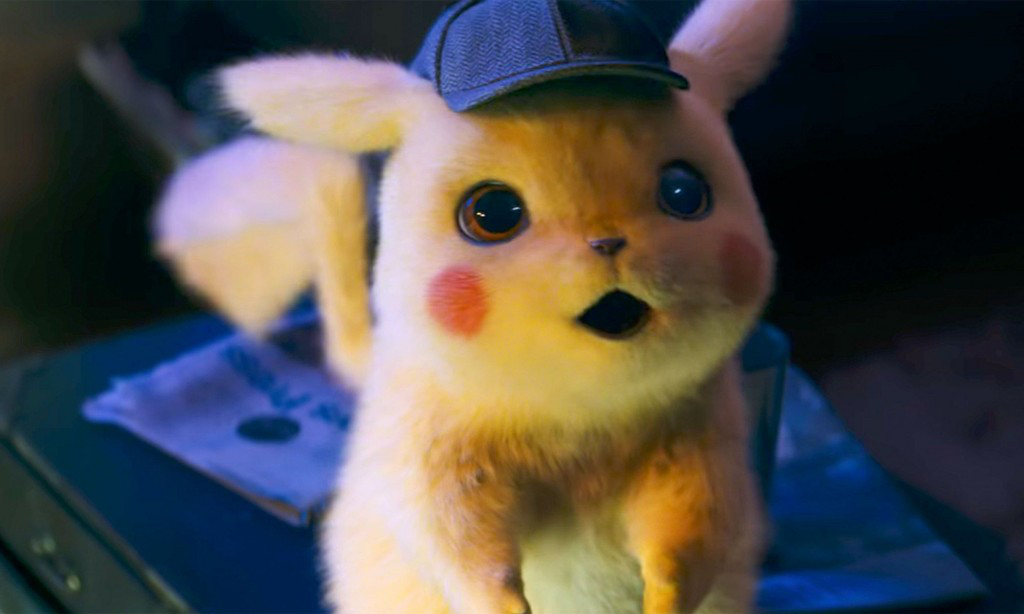

In [49]:
url = input("Please enter the url for pokemon image : ")
print()
identify(url)